In [11]:
import os
import sys
import cv2
sys.path.append("..")
from PIL import Image
from utils.data_utils import read_img, show, draw_box, write_text

from modelLoader import loadAllBodystylePanelModel
from detect import detectObj

detector = loadAllBodystylePanelModel()

%load_ext autoreload
%autoreload 2

Weight format of PointRend models have changed! Applying automatic conversion now ...
The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


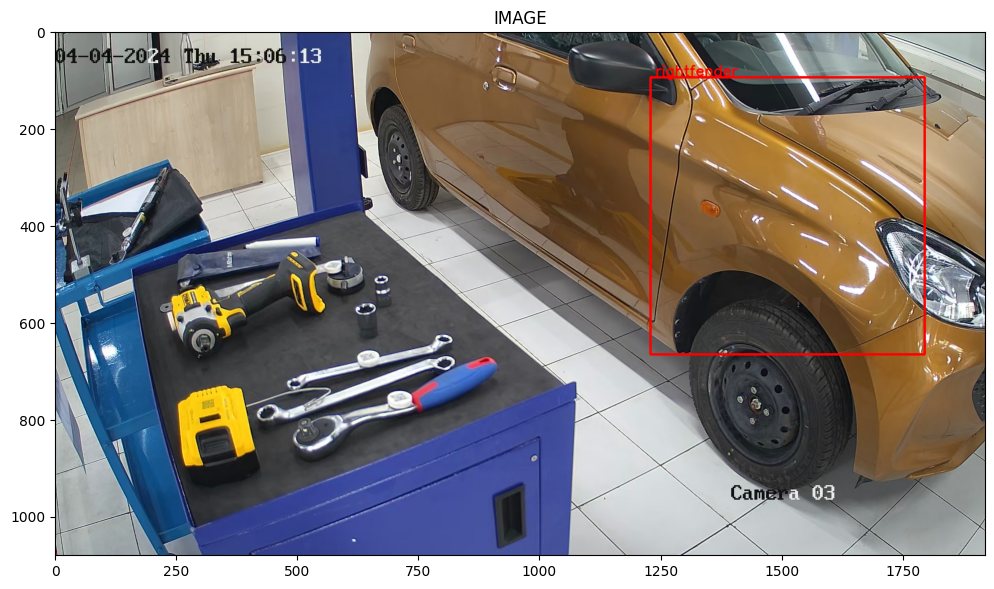

In [12]:
data_dir = "test_images"

for imgname in os.listdir(data_dir):
    if "no" not in imgname:continue #no fender cover
    #if imgname != "frame_7540.jpg":continue
    imgpath = f"{data_dir}/{imgname}"
    img = read_img(imgpath)
    
    detections = detectObj(detector, img, imgpath)
    
    for i, bbox in enumerate(detections['rois']):
        class_name = detections['class_names'][i]
        bbox = [int(i) for i in bbox]
        
        
        if 'fender' not in class_name: continue
        
        img = draw_box(img, bbox, (255,0,0))
        img = write_text(img, class_name, bbox[:2])
        
        x1,y1,x2,y2 = bbox
        cropped_img = img[y1:y2, x1:x2]
        
        show(img)
        Image.fromarray(cropped_img).save(f"{data_dir}/cropped_nofender.jpg")
        
        
        
    
    

    
    





array([[1.69628882e+03, 3.88120850e+02, 1.91841406e+03, 6.17320984e+02],
       [1.31358057e+03, 5.50435791e+02, 1.64175098e+03, 9.42725403e+02],
       [7.80399841e+02, 3.00379456e+02, 1.22395190e+03, 6.14463379e+02],
       [1.53054468e+03, 9.53389282e+01, 1.74724963e+03, 1.71907318e+02],
       [1.22985498e+03, 9.56451111e+01, 1.79526477e+03, 6.66755554e+02],
       [1.06346423e+03, 2.60393791e+01, 1.24354858e+03, 1.26575790e+02],
       [1.35178662e+03, 6.45243713e+02, 1.54209705e+03, 8.94427795e+02],
       [1.38100476e+03, 1.19715004e+02, 1.91277161e+03, 4.83289154e+02],
       [7.76987244e+02, 1.08287847e+00, 1.30893494e+03, 6.01737366e+02],
       [1.68268274e+03, 8.36450272e+01, 1.78395239e+03, 1.61018997e+02],
       [1.29405054e+03, 1.87910169e-01, 1.80636877e+03, 1.70730072e+02],
       [8.99626953e+02, 6.57440262e+01, 9.57931824e+02, 1.20633591e+02],
       [1.62111560e+03, 5.84915710e+02, 1.91607227e+03, 9.28131653e+02]],
      dtype=float32)

black proportion:  0.6162212030328782


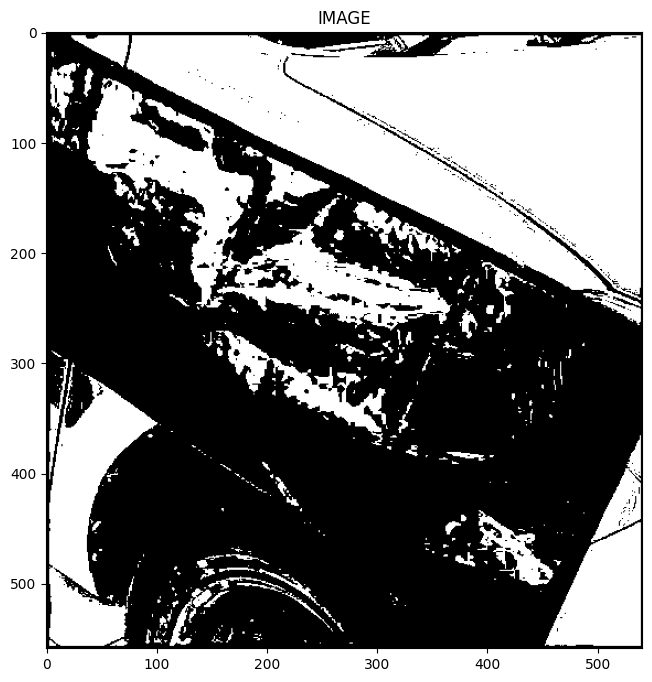

In [27]:
# Check cover overlap
data_dir = "test_images"
crop = read_img(f"{data_dir}/cropped_fender.jpg")
h, w, _ = crop.shape
crop = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)

_, crop = cv2.threshold(crop, 70, 255, cv2.THRESH_BINARY)

# Calculate the proportion of black pixels
total_pixels = w * h
white_pixels = cv2.countNonZero(crop)
white_proportion = white_pixels / total_pixels

# Define a threshold for black coverage
threshold = 0.9  # Adjust as needed

print("black proportion: ", 1 - white_proportion)

show(crop, cmap = 'gray')


black proportion:  0.29888052081463923


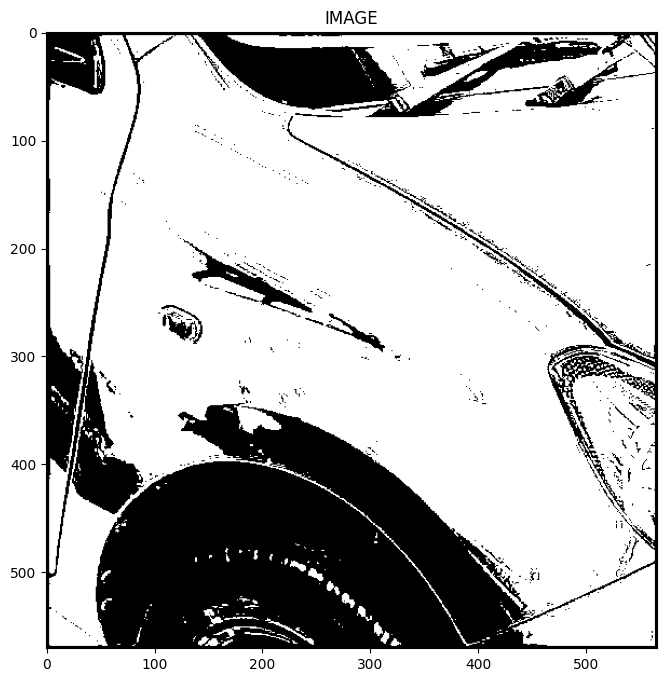

In [28]:
# Check cover overlap
data_dir = "test_images"
crop = read_img(f"{data_dir}/cropped_nofender.jpg")
h, w, _ = crop.shape
crop = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)

_, crop = cv2.threshold(crop, 70, 255, cv2.THRESH_BINARY)

# Calculate the proportion of black pixels
total_pixels = w * h
white_pixels = cv2.countNonZero(crop)
white_proportion = white_pixels / total_pixels

# Define a threshold for black coverage
threshold = 0.9  # Adjust as needed

print("black proportion: ", 1 - white_proportion)
show(crop, cmap = 'gray')